In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  #i/p 4D Array(60000,28,28,1) (so last o/p format also 4D(1x28x28x1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) #  (10000,28,28,1)

In [4]:
x_train.shape
# neural network model expects the input data to be in a specific format, which is a 4D array 
#with shape (N, H, W, C), where N is the number of samples, H and W are the height and width of the images, and C is the number of color channels.
#1-->grey scale image

(60000, 28, 28, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train /= 255
x_test /= 255
#x_train and x_test now have pixel values in the range of 0 to 1.

In [7]:
#Encoding Digit MNIST Labels
from keras.utils import to_categorical     #0-9 10 classes

y_train = to_categorical(y_train, num_classes=10)

y_test = to_categorical(y_test, num_classes=10)

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [18]:
# Compile the model
# Train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, batch_size=128, epochs=10,validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 21s 43ms/step - loss: 0.2266 - accuracy: 0.9344 - val_loss: 0.0880 - val_accuracy: 0.9739
Epoch 2/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0742 - accuracy: 0.9779 - val_loss: 0.0560 - val_accuracy: 0.9810
Epoch 3/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0513 - accuracy: 0.9847 - val_loss: 0.0502 - val_accuracy: 0.9837
Epoch 4/10
469/469 [==============================] - 24s 50ms/step - loss: 0.0381 - accuracy: 0.9888 - val_loss: 0.0483 - val_accuracy: 0.9832
Epoch 5/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.0454 - val_accuracy: 0.9837
Epoch 6/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0446 - val_accuracy: 0.9857
Epoch 7/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0191 - accuracy: 0.9945 - val_loss: 0.0434 - val_accuracy:

In [21]:
y_predict = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [22]:
y_predict[0]    # 0-9 la At first 0 image la yena handwriiten image kila [0-9] image number la iruku.partha theriyadhu

array([4.5572218e-12, 5.0203681e-07, 1.0345645e-08, 2.7829968e-08,
       1.4342412e-10, 9.8541904e-11, 2.5631048e-14, 9.9999952e-01,
       2.5732326e-08, 8.3604563e-09], dtype=float32)

In [23]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
# here we convert to one hot encoded array changes to number 0 image la yena handwritten no nu we knows

In [24]:
y_predicts[0]                                                                         # (Predicted o/p)

7

In [25]:
y_test_eval=np.argmax(y_test, axis=1)      #test o/p also convert to argmax  (Actualo/p)

In [26]:
y_test_eval[0]

7

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



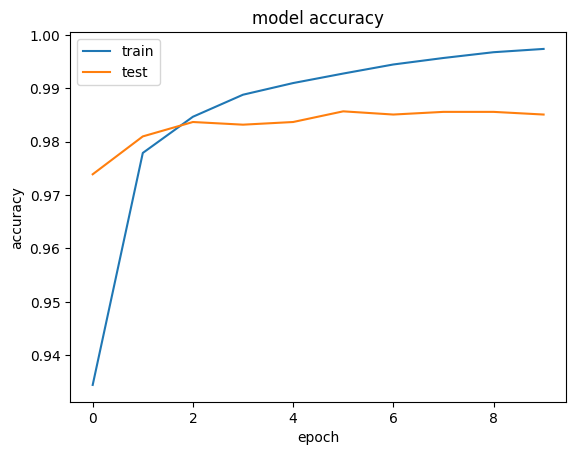

In [29]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.show()

#Acuracy always from Decreasing to Increasing level(more train and test gives good result)

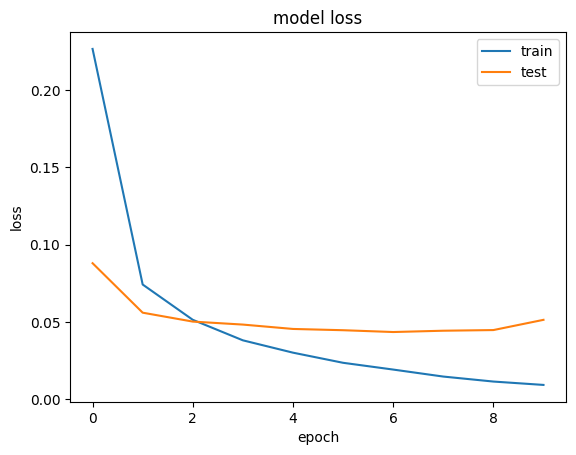

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

1/1 [==============================] - 0s 414ms/step
7


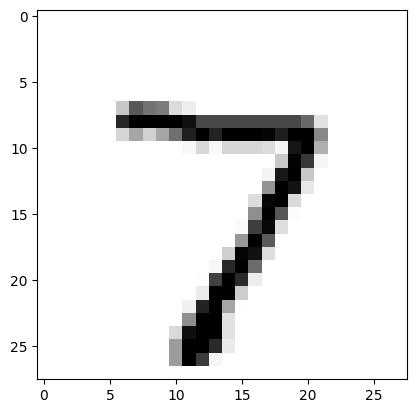

In [33]:
import matplotlib.pyplot as plt
image_index = 0
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))#(no of sample at a time,height,width,greyscale) i/p 4D la dhan so here also 4D
print(pred.argmax())
#reshape the input data into a 4D array with dimensions 1x28x28x1, which is the input format for the neural network model.